# Kaggle Titanic challenge

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


## 1) Data exploration and analysis

In [3]:
# Fetch data from kaggle using kaggle-cli
# kg download -c titanic -u Bobox214 -p XXXXX

In [4]:
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Olsen, Mr. Karl Siegwart Andreas",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S


In [6]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
pd.isnull(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 2) Data visualization

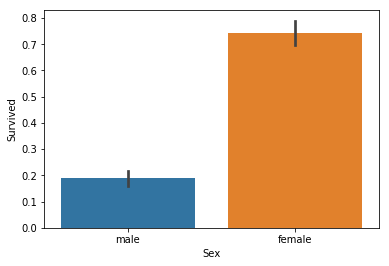

In [8]:
sns.barplot(x="Sex",y="Survived",data=train)

In [9]:
print('Percentage of females who survived:',train["Survived"][train["Sex"]=="female"].value_counts(normalize=True)[1])

Percentage of females who survived: 0.7420382165605095


In [10]:
print('Percentage of males who survived:',train["Survived"][train["Sex"]=="male"].value_counts(normalize=True)[1])

Percentage of males who survived: 0.18890814558058924


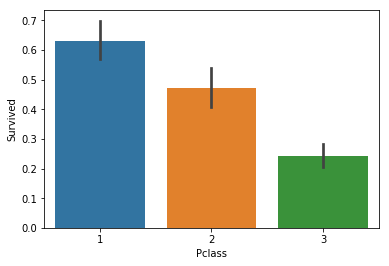

In [11]:
sns.barplot(x="Pclass",y="Survived",data=train)

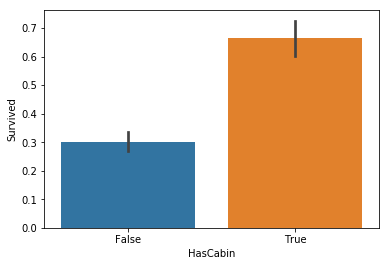

In [12]:
train["HasCabin"] = ~train["Cabin"].isnull()
test["HasCabin"] = ~test['Cabin'].isnull()
sns.barplot(x="HasCabin",y="Survived",data=train)

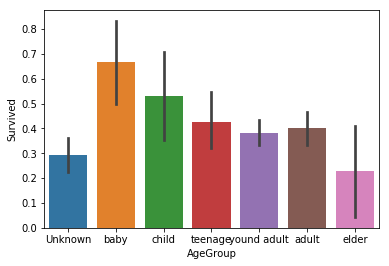

In [13]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age']  = test['Age'].fillna(-0.5)
bins = [-1,0,3,10,18,35,60,np.inf]
labels = ['Unknown','baby','child','teenage','yound adult','adult','elder']
train["AgeGroup"] = pd.cut(train["Age"],bins,labels=labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels=labels)
sns.barplot(x="AgeGroup",y="Survived",data=train)

In [14]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

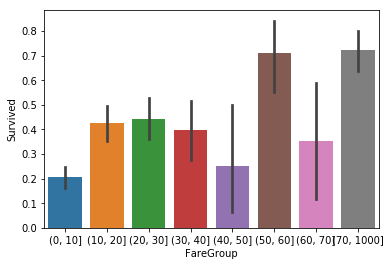

In [15]:
bins = list(range(0,80,10))+[1000]
train.Fare.fillna(0)
test.Fare.fillna(0)
train["FareGroup"] = pd.cut(train.Fare,bins)
sns.barplot(x='FareGroup',y='Survived',data=train)

In [16]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 3) Cleaning Data

In [17]:
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')

In [18]:
combine = [train,test]

In [19]:
for dataset in combine:
    dataset['HasCabin'] = ~dataset['Cabin'].isnull()

In [20]:
# predict missing age

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    dataset['Title'] = dataset.Title.replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset.Title.replace('Mlle','Miss')
    dataset['Title'] = dataset.Title.replace(['Countess','Lady','Mme'],'Mrs')
    dataset['Title'] = dataset.Title.replace(['Sir','Ms'],'Mr')
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,184,0
Mr,1,518
Mrs,128,0
Rare,1,19


In [21]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.159923
3,Mrs,0.796875
4,Rare,0.250000


In [22]:
titleMap = {'Master':1,'Miss':2,'Mr':3,'Mrs':4,'Rare':5}
for dataset in combine:
    dataset["Title"] = dataset['Title'].map(titleMap)
    dataset["Title"].fillna(0)

In [23]:
for dataset in combine:
    for i in range(1,6):
        mean = train[train.Title==i].Age.mean()
        dataset.loc[dataset.Title==i,'Age'] = mean

In [24]:
sex_map = {'male':0 , 'female':1}
for dataset in combine:
    dataset.Sex = dataset.Sex.map(sex_map)

In [25]:
emb_map = {'S':0,'C':1,'Q':2,np.nan:0}
for dataset in combine:
    dataset.Embarked = dataset.Embarked.map(emb_map)

In [26]:
for dataset in combine:
    dataset['Fare'].fillna(0,inplace=True)
    dataset['FareGroup'] = pd.cut(dataset['Fare'],4,labels=[1,2,3,4])

In [27]:
for dataset in combine:
    dataset.drop(['Name','Ticket','Fare','Cabin'],axis='columns',inplace=True)

In [28]:
train.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,HasCabin,Title,FareGroup
504,505,1,1,1,21.804054,0,0,0,True,2,1


In [29]:
test.sample()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,HasCabin,Title,FareGroup
24,916,1,1,35.873874,1,3,1,True,4,3


## Choosing the best model

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Support Vector Machines
from sklearn.svm import SVC
# Linear SVC
from sklearn.svm import LinearSVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
accuracies = []
for i in range(100):
    predictors = train.drop(["Survived",'PassengerId'],axis='columns')
    target = train['Survived']
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.22)
    results = []
    for model in [GaussianNB,LogisticRegression,SVC,LinearSVC,DecisionTreeClassifier
                  ,KNeighborsClassifier,SGDClassifier,GradientBoostingClassifier]:
        m = model()
        m.fit(x_train,y_train)
        y_pred = m.predict(x_val)
        results.append(round(accuracy_score(y_pred, y_val) * 100, 2))
    accuracies.append(results)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [32]:
models = pd.DataFrame(accuracies,columns=['GaussianNB','Logistic','SVC','linearSVC','DecisionTree'
                                          ,'KNN','SGD','GradientBoosting'])

In [33]:
models.mean(axis=0).sort_values(ascending=False)

SVC                 82.8681
Logistic            82.6699
GradientBoosting    82.0662
DecisionTree        81.4924
KNN                 81.3658
GaussianNB          77.8220
linearSVC           75.8630
SGD                 64.1621
dtype: float64

## Create model

In [34]:
predictors = train.drop(["Survived",'PassengerId'],axis='columns')
target = train['Survived']
model = SVC()
model.fit(predictors,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Submissions

In [35]:
test.sample()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,HasCabin,Title,FareGroup
329,1221,2,0,32.39875,0,0,0,False,3,1


In [36]:
ids = test['PassengerId']
predictions = model.predict(test.drop('PassengerId',axis=1))

In [37]:
output = pd.DataFrame( {'PassengerId':ids , 'Survived':predictions})

In [38]:
output.to_csv('data/AllModels.csv',index=False)

In [39]:
!ls -lart data

total 112
-rw-rw-r-- 1 paperspace paperspace 61194 Feb 13 13:59 train.csv
-rw-rw-r-- 1 paperspace paperspace 28629 Feb 13 13:59 test.csv
-rw-rw-r-- 1 paperspace paperspace  3258 Feb 13 13:59 gender_submission.csv
-rw-rw-r-- 1 paperspace paperspace  2839 Feb 13 15:38 test_sub.csv
-rw-rw-r-- 1 paperspace paperspace  2839 Feb 15 15:43 logisticRegression.csv
drwxrwxr-x 2 paperspace paperspace  4096 Feb 17 11:03 .
drwxrwxr-x 4 paperspace paperspace  4096 Feb 17 11:05 ..
-rw-rw-r-- 1 paperspace paperspace  2839 Feb 17 11:06 AllModels.csv


In [40]:
# Submit data to kaggle using kaggle-cli
# kg submit data/test_sub.csv -c titanic -u Bobox214 -p XXXXX